In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [13]:

df = pd.read_csv("simulation/controllers/members_supervisor/task_assignments_data.csv")


In [14]:
time_out_eval = pysqldf(
    "select count(approach) as count, approach from df where timed_out = True group by approach order by count desc"
)
time_out_eval


,count,approach
0,11,mean_field
1,6,market
2,2,hungarian
3,1,threshold


In [15]:
full_eval = pysqldf(
"""
select 
    approach, 
    n_robots, 
    COUNT(mean_pos_error) as no_of_simulations, 
    AVG(mean_pos_error) as avg_pos_error,
    AVG(max_time) as avg_max_time,
    AVG(total_energy) as avg_total_energy
from df 
group by approach, n_robots 
order by approach, n_robots
"""
) 
full_eval


,approach,n_robots,no_of_simulations,avg_pos_error,avg_max_time,avg_total_energy
0,hungarian,2,30,0.025133,8.869333,15.638200
1,hungarian,3,30,0.023967,8.937600,21.298933
2,hungarian,4,30,0.024367,8.428800,26.076433
3,hungarian,5,30,0.024933,8.890667,32.219000
4,hungarian,6,30,0.024900,8.964267,37.823900
5,hungarian,7,30,0.024700,8.012800,40.451267
6,hungarian,8,30,0.024367,9.062400,48.507133
7,hungarian,9,30,0.024700,9.650133,53.709733
8,hungarian,10,30,0.024200,8.998400,57.415500
9,market,2,30,0.025167,9.406933,17.175000


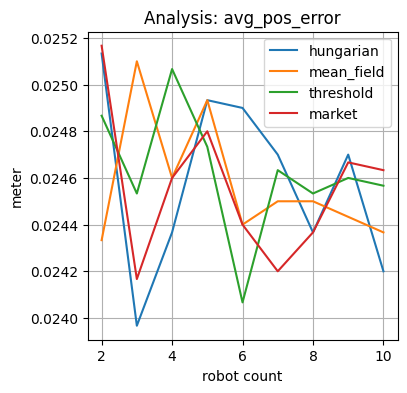

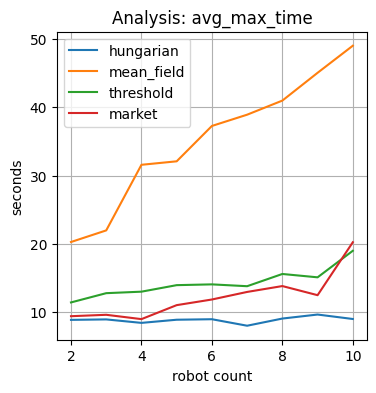

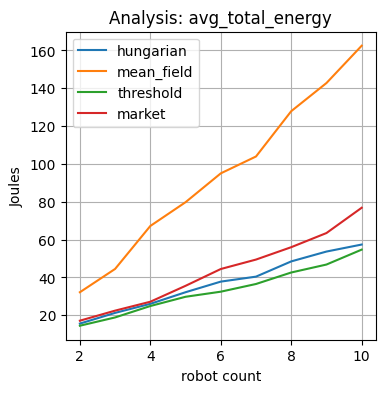

In [28]:
def plot_approach_eval(approaches:list[str], table_names=["full_eval"],append_table_name=False):

    cols=["avg_pos_error","avg_max_time","avg_total_energy"]
    y_labels=["meter","seconds","Joules"]
    axes = [plt.figure(figsize=[4,4]).add_subplot(1, 1, 1)  for _ in cols]
    
    for table_name in table_names:
        for approach in approaches:
            for ax, col, y_label in zip(axes,cols,y_labels):
                label=f"{table_name}_" if append_table_name else ''
                hun=pysqldf(f"select * from {table_name} where approach = '{approach}'")
                ax.plot(hun["n_robots"],hun[col], label =f"{label}{approach}")
                ax.legend()
                ax.set_title(f"Analysis: {col}")
                ax.set_xlabel('robot count')
                ax.set_ylabel(y_label)
                ax.grid(True)

    plt.show()
plot_approach_eval(["hungarian", "mean_field", "threshold","market"])
